
## Minimum Norm Solution



## Hong Real Gen

* Gen new data with real model

tensor([[2054.3281,  633.9849,   32.9984]])

tensor([[2468.8032, 1781.9651,  110.9102]])


## Web application (NOT deployed yet)

Run interactively on the web at: 




## Inputs



(2, 'i_h2i_rate')

(3, 'i_pci_rate')

(5, 'i_ngi_rate')

(6, 'i_o2_volfract')

(8, 'i_h2_temp')

(9, 'i_hbtemp')

(10, 'i_wind_rt')


## Outputs


* desired output requirements 


(27, 'o_tgt')

(29, 'o_hmt')

(39, 'o_prod_rt')

(40, 'o_fta')



In [1]:

## !pip install xgboost
## !pip install onnxmltools
## !pip install onnxruntime
## !pip install pandas
## !pip install scikit-learn
## !pip install matplotlib
## !pip install seaborn
## !pip install mlxtend
## ! pip install skl2onnx



In [2]:


import torch
import numpy as np
import pandas as pd
import sklearn
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import math
import seaborn as sns
import random
import functorch


import torch.optim as optim


from numpy.random import normal
from scipy.stats import norm
import scipy.stats as stats
from numpy import hstack
from numpy import vstack
from numpy import exp
from sklearn.neighbors import KernelDensity

##from typing import Optional

from torch import Tensor


from torch.utils.data import TensorDataset, DataLoader

from mlxtend.plotting import heatmap

## coefficient of determination (R**2)
from sklearn.metrics import r2_score

np.set_printoptions(suppress=True)
torch.set_printoptions(sci_mode=False)

import os, json, time, uuid


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score





In [5]:


import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor, DMatrix, train as train_xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import onnxmltools
from onnxmltools.convert.xgboost.operator_converters.XGBoost import (
    convert_xgboost)
from onnxmltools.convert import convert_xgboost as convert_xgboost_booster


from zipfile import ZipFile
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn, to_onnx, update_registered_converter
from skl2onnx.common.shape_calculator import (
    calculate_linear_classifier_output_shapes,
    calculate_linear_regressor_output_shapes)


# Import the ONNX runtime environment
import onnxruntime as rt




In [6]:

import PDFshapingUtils as PDF_tk


In [7]:

PDFshapingOBJ = PDF_tk.PDFshapingUtils()


In [8]:

PDFshapingOBJ.read_csv_file_with_pandas('CFD.16.2025.csv')


In [9]:

PDFshapingOBJ.CFD_raw_data


,index,case name,i_h2i_rate,i_pci_rate,i_wpi_rate,i_ngi_rate,i_o2_volfract,i_ng_temp,i_h2_temp,i_hbtemp,...,o_h2o_sollos,o_feo_sollos,o_hm_rt,o_mw_rt,o_wf_rt,o_hm_h2share,o_mw_h2share,o_wf_h2share,o_prod_rt,o_fta
0,1,H2-0_PCI-0_WPI-0_NG-120_O2-21_NGT-300_H2T-0_HB...,0,0,0,120,21,300,0,1200,...,20.0,44.9,122.0,264.0,687.0,31.6,26.7,63.5,4050.0,1800.0
1,2,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,18.5,52.6,122.0,265.0,684.0,27.9,23.4,60.6,4060.0,1850.0
2,3,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,19.6,50.9,123.0,266.0,690.0,27.7,23.5,60.8,4080.0,1850.0
3,4,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,19.2,52.2,124.0,268.0,690.0,27.7,23.2,60.6,4090.0,1850.0
4,5,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,19.2,52.4,124.0,268.0,695.0,27.7,23.2,60.7,4110.0,1850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,4995,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1600,...,18.7,40.3,353.0,763.0,2190.0,34.0,20.5,56.7,11700.0,2380.0
4995,4996,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1480,...,18.7,40.7,353.0,763.0,2190.0,33.8,20.4,56.8,11700.0,2310.0
4996,4997,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1600,...,19.2,37.5,353.0,763.0,2230.0,33.6,20.4,57.1,11700.0,2380.0
4997,4998,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1480,...,17.6,39.8,355.0,768.0,2220.0,34.0,20.0,55.7,11800.0,2310.0


In [10]:

PDFshapingOBJ.print_headers_list()


['index', 'case name', 'i_h2i_rate', 'i_pci_rate', 'i_wpi_rate', 'i_ngi_rate', 'i_o2_volfract', 'i_ng_temp', 'i_h2_temp', 'i_hbtemp', 'i_wind_rt', 'i_blastH2O', 'i_BdnH2O', 'i_sgi_rate', 'i_sgtemp', 'i_sgi_H2COratio', 'i_sgi_ReProRatio', 'o_tuy_velo', 'o_tuy_temp', 'o_burn', 'o_delp', 'o_co_vf', 'o_co2_vf', 'o_h2_vf', 'o_n2_vf', 'o_co_util', 'o_h2_util', 'o_tgt', 'o_coke_rt', 'o_hmt', 'o_co2_sollos', 'o_h2o_sollos', 'o_feo_sollos', 'o_hm_rt', 'o_mw_rt', 'o_wf_rt', 'o_hm_h2share', 'o_mw_h2share', 'o_wf_h2share', 'o_prod_rt', 'o_fta']
41
(0, 'index')
(1, 'case name')
(2, 'i_h2i_rate')
(3, 'i_pci_rate')
(4, 'i_wpi_rate')
(5, 'i_ngi_rate')
(6, 'i_o2_volfract')
(7, 'i_ng_temp')
(8, 'i_h2_temp')
(9, 'i_hbtemp')
(10, 'i_wind_rt')
(11, 'i_blastH2O')
(12, 'i_BdnH2O')
(13, 'i_sgi_rate')
(14, 'i_sgtemp')
(15, 'i_sgi_H2COratio')
(16, 'i_sgi_ReProRatio')
(17, 'o_tuy_velo')
(18, 'o_tuy_temp')
(19, 'o_burn')
(20, 'o_delp')
(21, 'o_co_vf')
(22, 'o_co2_vf')
(23, 'o_h2_vf')
(24, 'o_n2_vf')
(25, 'o_co_ut

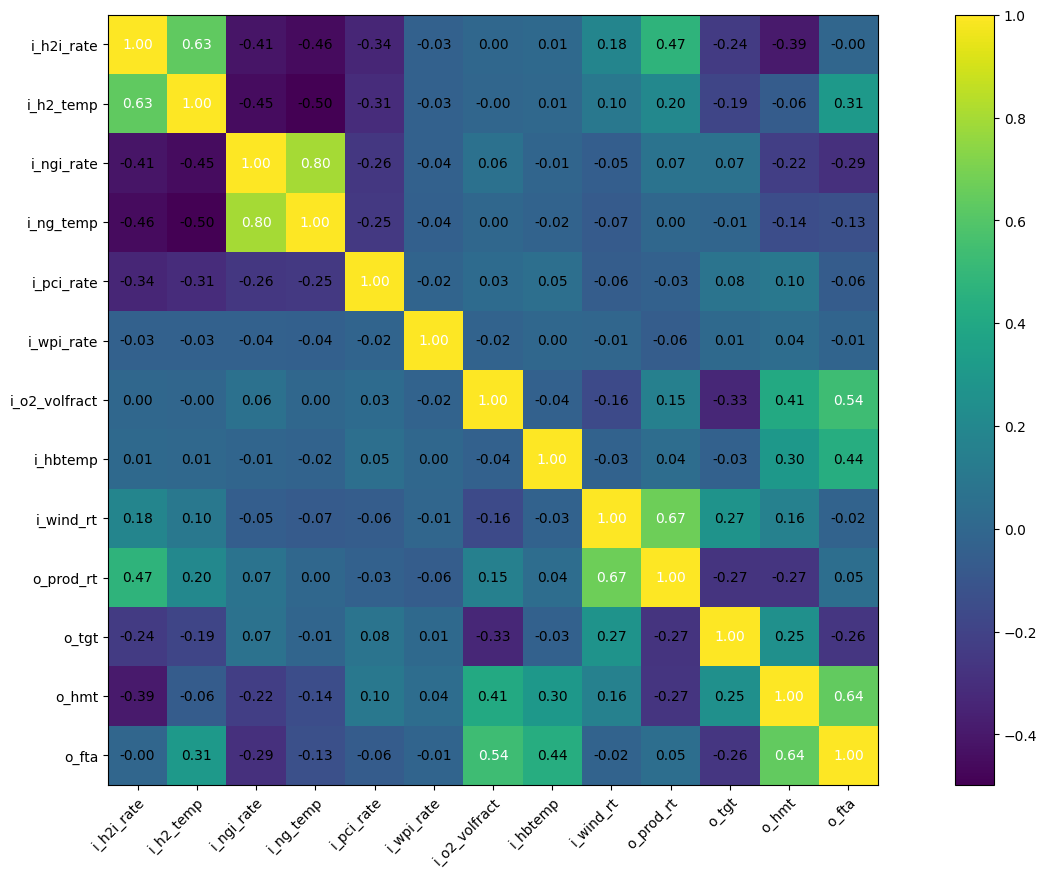

In [11]:


PDFshapingOBJ.list_of_selected_column_names = ['i_h2i_rate','i_h2_temp','i_ngi_rate','i_ng_temp','i_pci_rate',
                    'i_wpi_rate','i_o2_volfract',
                    'i_hbtemp','i_wind_rt','o_prod_rt', 'o_tgt', 'o_hmt','o_fta']



PDFshapingOBJ.print_correlation_coefficients()


In [12]:

PDFshapingOBJ.convert_pd_data_to_numpy()


[[1
  'H2-0_PCI-0_WPI-0_NG-120_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-7_SGI-0_SGT-0_SGC_0 '
  0 ... 63.5 4050.0 1800.0]
 [2
  'H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-1_SGI-0_SGT-0_SGC_0 '
  0 ... 60.6 4060.0 1850.0]
 [3
  'H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  0 ... 60.8 4080.0 1850.0]
 ...
 [4997
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1600_WR-230_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  30 ... 57.1 11700.0 2380.0]
 [4998
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1480_WR-230_MHB-5.7_BM-3_SGI-0_SGT-0_SGC_0 '
  30 ... 55.7 11800.0 2310.0]
 [4999
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1480_WR-230_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  30 ... 56.2 11800.0 2310.0]]
(4999, 41)


In [13]:

PDFshapingOBJ.gen_X_y_for_selected_indeces(  
                   inputs = [  2, 3, 5, 6, 8, 9, 10   ] , 
                   outputs= [ 27, 29, 39, 40 ]   
)


## inputs = [ 2, 3, 5, 6, 8, 9, 10  ]          ## the full 7



7
4


In [14]:

print(PDFshapingOBJ.X.shape)
print(PDFshapingOBJ.y.shape)


(4999, 7)
(4999, 4)


In [15]:

PDFshapingOBJ.random_seed = int( random.random() * 100  )         ## defautl is 42


In [16]:

PDFshapingOBJ.split_np_data_train_test(selected_test_size=0.2)


(3999, 7)
(1000, 7)
(3999, 4)
(1000, 4)


In [17]:

print(PDFshapingOBJ.X_train.shape)
print(PDFshapingOBJ.X_test.shape)

print(PDFshapingOBJ.y_train.shape)
print(PDFshapingOBJ.y_test.shape)


(3999, 7)
(1000, 7)
(3999, 4)
(1000, 4)


In [18]:

from sklearn.decomposition import PCA

# Instantiate PCA to reduce to 4 components
pca = PCA(n_components=4)

# Fit on training data and transform both train and test
X_train_pca = pca.fit_transform(PDFshapingOBJ.X_train)
X_test_pca  = pca.transform(PDFshapingOBJ.X_test)

# Replace the original inputs with PCA-reduced versions
PDFshapingOBJ.X_train = X_train_pca
PDFshapingOBJ.X_test  = X_test_pca





In [19]:

print(PDFshapingOBJ.X_train.shape)
print(PDFshapingOBJ.X_test.shape)

print(PDFshapingOBJ.y_train.shape)
print(PDFshapingOBJ.y_test.shape)


(3999, 4)
(1000, 4)
(3999, 4)
(1000, 4)


In [20]:

PDFshapingOBJ.convert_dataset_from_np_to_torch()


In [21]:

PDFshapingOBJ.standardize_X_scales()
PDFshapingOBJ.standardize_y_scales()


In [22]:


PDFshapingOBJ.gen_Dataloader_train()

PDFshapingOBJ.train_dl



## Model Forward ( 7x4 )


In [23]:


#############################################################
##   F1      plus       F2
## Linear     +      Nonlinear

class F1plusF2_SIO_Forward(nn.Module):
    ## initialize the layers
    def __init__(self, x_means, x_deviations, y_means, y_deviations,  device='cuda'):
        super().__init__()
        self.device = device
        
        ## self.x_means      = x_means
        ## self.x_deviations = x_deviations
        ## self.y_means      = y_means
        ## self.y_deviations = y_deviations
        
        
        self.x_means      = x_means.to(self.device)
        self.x_deviations = x_deviations.to(self.device)
        self.y_means      = y_means.to(self.device)
        self.y_deviations = y_deviations.to(self.device)
        
        
        
        ## F1
        self.f1_linear1 = nn.Linear(7, 4)       
        
        ## F2
        self.f2_linear1 = nn.Linear(7, 10)
        self.f2_act1    = nn.Sigmoid()                    ## Tanh()                       
        self.f2_linear2 = nn.Linear(10, 4)       
        self.f2_dropout = nn.Dropout(0.25)
        
        # Move model to device
        self.to(self.device)
        
        
    ## perform inference
    def forward(self, x):
        x = x.to(self.device)
        x = (x - self.x_means) / self.x_deviations
        
        ## F1
        f1 = self.f1_linear1(x)
        
        ## F2
        f2 = self.f2_linear1(x)
        f2 = self.f2_act1(f2)
        f2 = self.f2_dropout(f2)
        f2 = self.f2_linear2(f2)
        
        
        y_scaled   = f1 + f2
        y_descaled = y_scaled * self.y_deviations + self.y_means
        
        return y_descaled, y_scaled
    




In [24]:

n_inputs  = 4     ## 7
n_outputs = 4





    
class ResidualNet_Forward(nn.Module):
    def __init__(self, x_means, x_deviations, y_means, y_deviations, dropout_rate=0.1, device='cuda'):
        
        super().__init__()
        self.device = device
        
        self.x_means      = x_means.to(self.device)
        self.x_deviations = x_deviations.to(self.device)
        self.y_means      = y_means.to(self.device)
        self.y_deviations = y_deviations.to(self.device)

     
        self.fc1  = nn.Linear(n_inputs, 64)
        self.act1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)

        self.fc2 = nn.Linear(64, 64)
        self.act2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)

        self.fc3 = nn.Linear(64, n_outputs)

        # If input_dim ≠ 64, project for residual addition
        self.input_proj = nn.Linear(n_inputs, 64) if n_inputs != 64 else nn.Identity()
        
        # Move model to device
        self.to(self.device)
        

    def forward(self, x):
        x  = x.to(self.device)
        x  = (x - self.x_means) / self.x_deviations
        x0 = self.input_proj(x)
        x1 = self.dropout1(self.act1(self.fc1(x)))
        x2 = self.dropout2(self.act2(self.fc2(x1)))
        x_res = x2 + x0
        y_scaled = self.fc3(x_res)
        y_descaled = y_scaled * self.y_deviations + self.y_means
        
        return y_descaled, y_scaled
    

    


In [25]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## model_Forward     = F1plusF2_SIO_Forward(

model_Forward     =     ResidualNet_Forward(
                         PDFshapingOBJ.x_means, 
                         PDFshapingOBJ.x_deviations, 
                         PDFshapingOBJ.y_means, 
                         PDFshapingOBJ.y_deviations,
                         device=device  # pass device into the model
    
)

optimizer = optim.Adam(model_Forward.parameters(), lr=0.001)
loss_fn   = nn.MSELoss()



In [26]:

model_Forward.train()

for epoch in range(1000):
    for xb, yb in PDFshapingOBJ.train_dl:
        
        xb = xb.to(model_Forward.device)
        yb = yb.to(model_Forward.device)
        
        optimizer.zero_grad()
        pred_descaled, pred_scaled = model_Forward(xb)
        loss = loss_fn(pred_scaled, yb)
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print(epoch, ".....", loss.item() ) 
    



0 ..... 0.6995826959609985
100 ..... 0.41870930790901184
200 ..... 0.5680942535400391
300 ..... 0.3623034656047821
400 ..... 0.6240308880805969
500 ..... 0.35066041350364685
600 ..... 0.3732919991016388
700 ..... 0.5113745927810669
800 ..... 0.5106321573257446
900 ..... 0.4387892484664917


In [27]:

print("=== SANITY CHECK: SCALING ===")
print("y_means:", PDFshapingOBJ.y_means)
print("y_deviations:", PDFshapingOBJ.y_deviations)

print("===============================================")

print("x_means:", PDFshapingOBJ.x_means)
print("x_deviations:", PDFshapingOBJ.x_deviations)


=== SANITY CHECK: SCALING ===
y_means: tensor([[  98.2877, 1301.0071, 8422.6699, 2305.0889]])
y_deviations: tensor([[  51.2402,  521.4102, 1515.9036,  211.2944]])
x_means: tensor([[    -0.0000,     -0.0000,      0.0000,      0.0000]])
x_deviations: tensor([[358.4878, 158.1382,  50.6988,  31.1951]])


In [28]:

print(PDFshapingOBJ.y_means -  PDFshapingOBJ.y_deviations)
print(PDFshapingOBJ.y_means +  PDFshapingOBJ.y_deviations)


tensor([[  47.0475,  779.5969, 6906.7666, 2093.7944]])
tensor([[ 149.5278, 1822.4172, 9938.5732, 2516.3833]])



## Is model  invertible ?

* use the Jacobian


In [29]:

import torch
from torch.autograd.functional import jacobian


In [30]:

## x = torch.randn(1, 7, requires_grad=True)

x = torch.randn(      7, requires_grad=True)  # shape [7]

x = torch.randn(      4, requires_grad=True)  # shape [7]


In [31]:

def wrapped_model(x):
    y_descaled, _ = model_Forward(x)
    return y_descaled  # Only return 1 tensor to get a clean Jacobian




In [32]:

## J = jacobian(model_Forward, x)

J = jacobian(wrapped_model, x)


In [33]:

print( len(J) )


1


In [34]:


print( J.shape )  # Should be [1, 4, 7]


torch.Size([1, 4, 4])


In [35]:

u, s, v = torch.svd(J)  


In [36]:

rank = (s > 1e-5).sum()


In [37]:


print("Local Jacobian rank:", rank.item())


Local Jacobian rank: 4



## For each test set point


In [38]:

print( PDFshapingOBJ.X_test_tr.shape )
print( PDFshapingOBJ.y_test_tr.shape )


torch.Size([1000, 4])
torch.Size([1000, 4])


In [39]:

def get_jacobian_rank(x_point):
    x_point = x_point.detach().clone().requires_grad_(True)  # shape [7]
    J = jacobian(wrapped_model, x_point)
    u, s, v = torch.svd(J)
    return (s > 1e-5).sum().item()  # Rank


In [40]:



for i in range(1000):
    
    ## x_i = X_data[i]  # shape: [7]
    
    x_i = PDFshapingOBJ.X_test_tr[i]
    
    rank = get_jacobian_rank(x_i)
    
    print(f"Sample {i}: Jacobian rank = {rank}")



Sample 0: Jacobian rank = 4
Sample 1: Jacobian rank = 4
Sample 2: Jacobian rank = 4
Sample 3: Jacobian rank = 4
Sample 4: Jacobian rank = 4
Sample 5: Jacobian rank = 4
Sample 6: Jacobian rank = 4
Sample 7: Jacobian rank = 4
Sample 8: Jacobian rank = 4
Sample 9: Jacobian rank = 4
Sample 10: Jacobian rank = 4
Sample 11: Jacobian rank = 4
Sample 12: Jacobian rank = 4
Sample 13: Jacobian rank = 4
Sample 14: Jacobian rank = 4
Sample 15: Jacobian rank = 4
Sample 16: Jacobian rank = 4
Sample 17: Jacobian rank = 4
Sample 18: Jacobian rank = 4
Sample 19: Jacobian rank = 4
Sample 20: Jacobian rank = 4
Sample 21: Jacobian rank = 4
Sample 22: Jacobian rank = 4
Sample 23: Jacobian rank = 4
Sample 24: Jacobian rank = 4
Sample 25: Jacobian rank = 4
Sample 26: Jacobian rank = 4
Sample 27: Jacobian rank = 4
Sample 28: Jacobian rank = 4
Sample 29: Jacobian rank = 4
Sample 30: Jacobian rank = 4
Sample 31: Jacobian rank = 4
Sample 32: Jacobian rank = 4
Sample 33: Jacobian rank = 4
Sample 34: Jacobian rank

Sample 520: Jacobian rank = 4
Sample 521: Jacobian rank = 4
Sample 522: Jacobian rank = 4
Sample 523: Jacobian rank = 4
Sample 524: Jacobian rank = 4
Sample 525: Jacobian rank = 4
Sample 526: Jacobian rank = 4
Sample 527: Jacobian rank = 4
Sample 528: Jacobian rank = 4
Sample 529: Jacobian rank = 4
Sample 530: Jacobian rank = 4
Sample 531: Jacobian rank = 4
Sample 532: Jacobian rank = 4
Sample 533: Jacobian rank = 4
Sample 534: Jacobian rank = 4
Sample 535: Jacobian rank = 4
Sample 536: Jacobian rank = 4
Sample 537: Jacobian rank = 4
Sample 538: Jacobian rank = 4
Sample 539: Jacobian rank = 4
Sample 540: Jacobian rank = 4
Sample 541: Jacobian rank = 4
Sample 542: Jacobian rank = 4
Sample 543: Jacobian rank = 4
Sample 544: Jacobian rank = 4
Sample 545: Jacobian rank = 4
Sample 546: Jacobian rank = 4
Sample 547: Jacobian rank = 4
Sample 548: Jacobian rank = 4
Sample 549: Jacobian rank = 4
Sample 550: Jacobian rank = 4
Sample 551: Jacobian rank = 4
Sample 552: Jacobian rank = 4
Sample 553

Sample 806: Jacobian rank = 4
Sample 807: Jacobian rank = 4
Sample 808: Jacobian rank = 4
Sample 809: Jacobian rank = 4
Sample 810: Jacobian rank = 4
Sample 811: Jacobian rank = 4
Sample 812: Jacobian rank = 4
Sample 813: Jacobian rank = 4
Sample 814: Jacobian rank = 4
Sample 815: Jacobian rank = 4
Sample 816: Jacobian rank = 4
Sample 817: Jacobian rank = 4
Sample 818: Jacobian rank = 4
Sample 819: Jacobian rank = 4
Sample 820: Jacobian rank = 4
Sample 821: Jacobian rank = 4
Sample 822: Jacobian rank = 4
Sample 823: Jacobian rank = 4
Sample 824: Jacobian rank = 4
Sample 825: Jacobian rank = 4
Sample 826: Jacobian rank = 4
Sample 827: Jacobian rank = 4
Sample 828: Jacobian rank = 4
Sample 829: Jacobian rank = 4
Sample 830: Jacobian rank = 4
Sample 831: Jacobian rank = 4
Sample 832: Jacobian rank = 4
Sample 833: Jacobian rank = 4
Sample 834: Jacobian rank = 4
Sample 835: Jacobian rank = 4
Sample 836: Jacobian rank = 4
Sample 837: Jacobian rank = 4
Sample 838: Jacobian rank = 4
Sample 839


## Condition number


In [41]:


def get_jacobian_info(x_point):
    x_point = x_point.detach().clone().requires_grad_(True)  # shape: [7]
    J = jacobian(wrapped_model, x_point)  # shape: [output_dim, input_dim]

    # Compute rank
    u, s, v = torch.svd(J)
    rank = (s > 1e-5).sum().item()

    # Compute condition number safely
    if s.min().item() < 1e-12:
        cond_number = float('inf')
    else:
        cond_number = s.max().item() / s.min().item()

    return rank, cond_number


condition_numbers = []
# Loop through test samples
for i in range(1000):
    x_i = PDFshapingOBJ.X_test_tr[i]
    rank, cond_number = get_jacobian_info(x_i)
    print(f"Sample {i}: Jacobian rank = {rank}, Condition number = {cond_number:.2e}")
    condition_numbers.append( cond_number)


Sample 0: Jacobian rank = 4, Condition number = 5.77e+03
Sample 1: Jacobian rank = 4, Condition number = 1.76e+05
Sample 2: Jacobian rank = 4, Condition number = 1.71e+05
Sample 3: Jacobian rank = 4, Condition number = 1.72e+03
Sample 4: Jacobian rank = 4, Condition number = 2.24e+03
Sample 5: Jacobian rank = 4, Condition number = 2.97e+05
Sample 6: Jacobian rank = 4, Condition number = 9.98e+04
Sample 7: Jacobian rank = 4, Condition number = 9.13e+02
Sample 8: Jacobian rank = 4, Condition number = 3.76e+04
Sample 9: Jacobian rank = 4, Condition number = 3.82e+02
Sample 10: Jacobian rank = 4, Condition number = 7.35e+02
Sample 11: Jacobian rank = 4, Condition number = 2.06e+06
Sample 12: Jacobian rank = 4, Condition number = 5.87e+04
Sample 13: Jacobian rank = 4, Condition number = 1.78e+04
Sample 14: Jacobian rank = 4, Condition number = 3.17e+04
Sample 15: Jacobian rank = 4, Condition number = 1.06e+04
Sample 16: Jacobian rank = 4, Condition number = 1.86e+04
Sample 17: Jacobian rank

Sample 232: Jacobian rank = 4, Condition number = 6.76e+03
Sample 233: Jacobian rank = 4, Condition number = 1.80e+02
Sample 234: Jacobian rank = 4, Condition number = 9.05e+03
Sample 235: Jacobian rank = 4, Condition number = 2.15e+04
Sample 236: Jacobian rank = 4, Condition number = 1.94e+04
Sample 237: Jacobian rank = 4, Condition number = 6.69e+04
Sample 238: Jacobian rank = 4, Condition number = 2.96e+03
Sample 239: Jacobian rank = 4, Condition number = 2.18e+04
Sample 240: Jacobian rank = 4, Condition number = 1.65e+03
Sample 241: Jacobian rank = 4, Condition number = 5.69e+03
Sample 242: Jacobian rank = 4, Condition number = 2.34e+04
Sample 243: Jacobian rank = 4, Condition number = 5.40e+04
Sample 244: Jacobian rank = 4, Condition number = 5.45e+04
Sample 245: Jacobian rank = 4, Condition number = 2.70e+03
Sample 246: Jacobian rank = 4, Condition number = 1.40e+03
Sample 247: Jacobian rank = 4, Condition number = 2.09e+03
Sample 248: Jacobian rank = 4, Condition number = 1.63e+

Sample 514: Jacobian rank = 4, Condition number = 4.29e+03
Sample 515: Jacobian rank = 4, Condition number = 1.59e+03
Sample 516: Jacobian rank = 4, Condition number = 1.06e+03
Sample 517: Jacobian rank = 4, Condition number = 1.11e+03
Sample 518: Jacobian rank = 4, Condition number = 9.93e+02
Sample 519: Jacobian rank = 4, Condition number = 6.11e+04
Sample 520: Jacobian rank = 4, Condition number = 1.43e+04
Sample 521: Jacobian rank = 4, Condition number = 9.51e+03
Sample 522: Jacobian rank = 4, Condition number = 2.32e+03
Sample 523: Jacobian rank = 4, Condition number = 1.82e+03
Sample 524: Jacobian rank = 4, Condition number = 7.35e+03
Sample 525: Jacobian rank = 4, Condition number = 1.11e+05
Sample 526: Jacobian rank = 4, Condition number = 1.70e+04
Sample 527: Jacobian rank = 4, Condition number = 9.13e+03
Sample 528: Jacobian rank = 4, Condition number = 1.53e+04
Sample 529: Jacobian rank = 4, Condition number = 1.80e+04
Sample 530: Jacobian rank = 4, Condition number = 1.37e+

Sample 799: Jacobian rank = 4, Condition number = 8.76e+03
Sample 800: Jacobian rank = 4, Condition number = 5.19e+04
Sample 801: Jacobian rank = 4, Condition number = 1.19e+04
Sample 802: Jacobian rank = 4, Condition number = 9.12e+04
Sample 803: Jacobian rank = 4, Condition number = 2.03e+02
Sample 804: Jacobian rank = 4, Condition number = 6.77e+02
Sample 805: Jacobian rank = 4, Condition number = 2.49e+03
Sample 806: Jacobian rank = 4, Condition number = 5.28e+03
Sample 807: Jacobian rank = 4, Condition number = 3.26e+02
Sample 808: Jacobian rank = 4, Condition number = 9.76e+04
Sample 809: Jacobian rank = 4, Condition number = 8.02e+01
Sample 810: Jacobian rank = 4, Condition number = 1.78e+04
Sample 811: Jacobian rank = 4, Condition number = 5.17e+02
Sample 812: Jacobian rank = 4, Condition number = 3.34e+03
Sample 813: Jacobian rank = 4, Condition number = 1.91e+04
Sample 814: Jacobian rank = 4, Condition number = 2.84e+04
Sample 815: Jacobian rank = 4, Condition number = 1.65e+

In [42]:

## [0, 999, 9999, 99999, 999999, 9999999, 99999999]


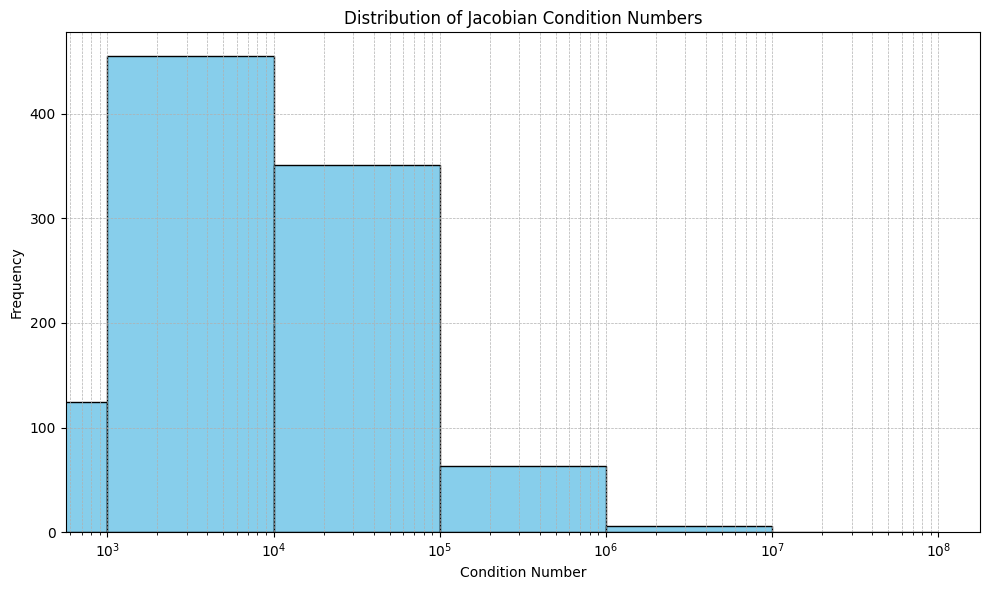

In [43]:



# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(condition_numbers, bins=[0, 999, 9999, 99999, 999999, 9999999, 99999999], 
              color='skyblue', edgecolor='black')
plt.title("Distribution of Jacobian Condition Numbers")
plt.xlabel("Condition Number")
plt.ylabel("Frequency")
plt.xscale("log")
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()



## Minimum Norm Solution


In [ ]:

def get_jacobian_MinNormSolution(x_point):
    x_point = x_point.detach().clone().requires_grad_(True)  # shape: [7]
    J = jacobian(wrapped_model, x_point)  # shape: [output_dim, input_dim]

    # Compute rank
    u, s, v = torch.svd(J)
    rank = (s > 1e-5).sum().item()

    # Compute condition number safely
    if s.min().item() < 1e-12:
        cond_number = float('inf')
    else:
        cond_number = s.max().item() / s.min().item()

    return rank, cond_number


condition_numbers = []
# Loop through test samples
for i in range(1000):
    x_i = PDFshapingOBJ.X_test_tr[i]
    rank, cond_number = get_jacobian_MinNormSolution(x_i)
    print(f"Sample {i}: Jacobian rank = {rank}, Condition number = {cond_number:.2e}")
    condition_numbers.append( cond_number)


In [ ]:


delta_y = torch.tensor([0.0, 0.0, 0.0, 50.0])  # e.g. raise o_fta by 50

x0 = PDFshapingOBJ.X_test_tr[0]
y0, _ = model_Forward(x0.to(device))

J = jacobian(wrapped_model, x0)
U, S, Vh = torch.linalg.svd(J, full_matrices=False)
S_inv = torch.diag(1.0 / S)
J_pinv = Vh.T @ S_inv @ U.T

delta_x = J_pinv @ delta_y

x1 = x0 + delta_x
y1, _ = model_Forward(x1.to(device))

print("Original y:", y0)
print("New y after delta_x:", y1)
print("Target y should be:", y0 + delta_y)




## test


In [48]:

def get_jacobian_MinNormSolution(x_point, delta_y):
    x_point = x_point.detach().clone().requires_grad_(True)
    J = jacobian(wrapped_model, x_point)  # shape [4, 4]

    # SVD
    u, s, v = torch.svd(J)
    rank = (s > 1e-5).sum().item()

    # Condition number
    if s.min().item() < 1e-12:
        cond_number = float('inf')
        delta_x = None
    else:
        cond_number = s.max().item() / s.min().item()
        # Ensure proper shapes for matrix multiplication
        S_inv = torch.diag(1.0 / s)
        J_pinv = v @ S_inv @ u.T  # shape [4, 4]
        delta_y = delta_y.view(-1, 1)  # make it shape [4, 1]
        delta_x = (J_pinv @ delta_y).view(-1)  # flatten back to [4]

    return rank, cond_number, delta_x




In [49]:

# Reasonable delta_y: try increasing o_fta (last output) by 50 units
delta_y = torch.tensor([0.0, 0.0, 0.0, 50.0], dtype=torch.float32).to(device)

# Results
condition_numbers = []
errors = []

for i in range(1000):
    x_i = PDFshapingOBJ.X_test_tr[i].to(device)

    rank, cond_number, delta_x = get_jacobian_MinNormSolution(x_i, delta_y)

    if delta_x is None:
        error = float('inf')
        msg = "❌ not invertible (singular)"
    else:
        x_new = x_i + delta_x
        y_orig, _ = model_Forward(x_i)
        y_new, _ = model_Forward(x_new)

        target_y = y_orig + delta_y
        error = torch.norm(y_new - target_y).item()

        # Simple interpretation
        if error < 5 and cond_number < 100:
            msg = "✅ invertible and stable"
        elif error < 15 and cond_number < 10000:
            msg = "⚠️ moderate error"
        else:
            msg = "❌ unstable or inaccurate"

    print(f"Sample {i}: error={error:.2f}, cond={cond_number:.2e}, rank={rank} → {msg}")
    condition_numbers.append(cond_number)
    errors.append(error)



RuntimeError: size mismatch, got 4, 4x4,1

In [50]:

def get_jacobian_MinNormSolution(x_point, delta_y):
    x_point = x_point.detach().clone().requires_grad_(True)

    # Jacobian
    J = jacobian(wrapped_model, x_point)   # shape [4, 4]

    # SVD for diagnostics only
    u, s, v = torch.svd(J)
    rank = (s > 1e-5).sum().item()

    # Condition number
    if s.min().item() < 1e-12:
        cond_number = float('inf')
        delta_x = None
    else:
        cond_number = (s.max() / s.min()).item()

        # ✅ Minimum‑norm solution (robust)
        J_pinv = torch.linalg.pinv(J)
        delta_x = J_pinv @ delta_y

    return rank, cond_number, delta_x



In [51]:

delta_y = torch.tensor([0.0, 0.0, 0.0, 50.0], device=device)

for i in range(1000):
    x_i = PDFshapingOBJ.X_test_tr[i].to(device)

    rank, cond_number, delta_x = get_jacobian_MinNormSolution(x_i, delta_y)

    if delta_x is None:
        print(f"Sample {i}: ❌ singular (rank={rank})")
        continue

    x_new = x_i + delta_x
    y_orig, _ = model_Forward(x_i)
    y_new, _ = model_Forward(x_new)

    error = torch.norm(y_new - (y_orig + delta_y)).item()

    # 🔎 Interpretation
    if error < 5 and cond_number < 100:
        msg = "✅ locally invertible"
    elif error < 20:
        msg = "⚠️ weakly invertible"
    else:
        msg = "❌ unstable inverse"

    print(
        f"Sample {i}: "
        f"rank={rank}, "
        f"cond={cond_number:.2e}, "
        f"error={error:.2f} → {msg}"
    )



Sample 0: rank=4, cond=6.37e+03, error=649.99 → ❌ unstable inverse
Sample 1: rank=4, cond=1.08e+04, error=294.12 → ❌ unstable inverse
Sample 2: rank=4, cond=2.37e+04, error=362.08 → ❌ unstable inverse
Sample 3: rank=4, cond=1.28e+04, error=1208.37 → ❌ unstable inverse
Sample 4: rank=4, cond=3.68e+03, error=298.44 → ❌ unstable inverse
Sample 5: rank=4, cond=2.65e+04, error=474.43 → ❌ unstable inverse
Sample 6: rank=4, cond=1.71e+04, error=844.56 → ❌ unstable inverse
Sample 7: rank=4, cond=1.23e+04, error=1828.33 → ❌ unstable inverse
Sample 8: rank=4, cond=2.73e+03, error=147.81 → ❌ unstable inverse
Sample 9: rank=4, cond=3.56e+02, error=209.99 → ❌ unstable inverse
Sample 10: rank=4, cond=3.89e+03, error=2127.92 → ❌ unstable inverse
Sample 11: rank=4, cond=2.74e+05, error=542.97 → ❌ unstable inverse
Sample 12: rank=4, cond=3.66e+03, error=158.59 → ❌ unstable inverse
Sample 13: rank=4, cond=4.63e+04, error=4717.27 → ❌ unstable inverse
Sample 14: rank=4, cond=1.18e+04, error=1540.10 → ❌ un

Sample 181: rank=4, cond=1.82e+03, error=184.50 → ❌ unstable inverse
Sample 182: rank=4, cond=3.80e+04, error=2977.27 → ❌ unstable inverse
Sample 183: rank=4, cond=9.11e+02, error=580.04 → ❌ unstable inverse
Sample 184: rank=4, cond=3.00e+04, error=1150.12 → ❌ unstable inverse
Sample 185: rank=4, cond=2.33e+04, error=5968.82 → ❌ unstable inverse
Sample 186: rank=4, cond=2.60e+04, error=11066.19 → ❌ unstable inverse
Sample 187: rank=4, cond=1.73e+03, error=405.22 → ❌ unstable inverse
Sample 188: rank=4, cond=4.76e+04, error=599.61 → ❌ unstable inverse
Sample 189: rank=4, cond=4.42e+03, error=178.57 → ❌ unstable inverse
Sample 190: rank=4, cond=2.15e+04, error=5655.16 → ❌ unstable inverse
Sample 191: rank=4, cond=6.94e+04, error=3218.77 → ❌ unstable inverse
Sample 192: rank=4, cond=1.26e+04, error=1197.61 → ❌ unstable inverse
Sample 193: rank=4, cond=3.41e+02, error=862.21 → ❌ unstable inverse
Sample 194: rank=4, cond=1.65e+05, error=567.10 → ❌ unstable inverse
Sample 195: rank=4, cond=5

Sample 373: rank=4, cond=1.09e+03, error=726.23 → ❌ unstable inverse
Sample 374: rank=4, cond=4.85e+03, error=5563.00 → ❌ unstable inverse
Sample 375: rank=4, cond=2.02e+04, error=2472.94 → ❌ unstable inverse
Sample 376: rank=4, cond=1.90e+03, error=3028.82 → ❌ unstable inverse
Sample 377: rank=4, cond=1.53e+04, error=115561.42 → ❌ unstable inverse
Sample 378: rank=4, cond=1.35e+04, error=440.56 → ❌ unstable inverse
Sample 379: rank=4, cond=6.10e+03, error=866.72 → ❌ unstable inverse
Sample 380: rank=4, cond=8.61e+04, error=1460.64 → ❌ unstable inverse
Sample 381: rank=4, cond=1.04e+04, error=2241.81 → ❌ unstable inverse
Sample 382: rank=4, cond=8.70e+02, error=706.60 → ❌ unstable inverse
Sample 383: rank=4, cond=1.66e+04, error=943.09 → ❌ unstable inverse
Sample 384: rank=4, cond=6.77e+03, error=1385.71 → ❌ unstable inverse
Sample 385: rank=4, cond=3.92e+04, error=2458.40 → ❌ unstable inverse
Sample 386: rank=4, cond=4.55e+03, error=280.67 → ❌ unstable inverse
Sample 387: rank=4, cond

Sample 565: rank=4, cond=1.73e+04, error=1154.75 → ❌ unstable inverse
Sample 566: rank=4, cond=9.70e+04, error=815.28 → ❌ unstable inverse
Sample 567: rank=4, cond=3.72e+04, error=1115.50 → ❌ unstable inverse
Sample 568: rank=4, cond=2.77e+04, error=260.73 → ❌ unstable inverse
Sample 569: rank=4, cond=1.06e+06, error=207.82 → ❌ unstable inverse
Sample 570: rank=4, cond=4.29e+03, error=551.17 → ❌ unstable inverse
Sample 571: rank=4, cond=1.34e+04, error=128.50 → ❌ unstable inverse
Sample 572: rank=4, cond=9.59e+02, error=361.10 → ❌ unstable inverse
Sample 573: rank=4, cond=1.10e+04, error=2628.17 → ❌ unstable inverse
Sample 574: rank=4, cond=3.42e+03, error=2886.34 → ❌ unstable inverse
Sample 575: rank=4, cond=2.22e+04, error=864.29 → ❌ unstable inverse
Sample 576: rank=4, cond=1.24e+04, error=2367.18 → ❌ unstable inverse
Sample 577: rank=4, cond=1.19e+04, error=15945.04 → ❌ unstable inverse
Sample 578: rank=4, cond=1.33e+03, error=2501.87 → ❌ unstable inverse
Sample 579: rank=4, cond=9

Sample 753: rank=4, cond=2.15e+04, error=771.85 → ❌ unstable inverse
Sample 754: rank=4, cond=1.86e+03, error=670.73 → ❌ unstable inverse
Sample 755: rank=4, cond=6.42e+03, error=175.05 → ❌ unstable inverse
Sample 756: rank=4, cond=1.36e+04, error=10433.60 → ❌ unstable inverse
Sample 757: rank=4, cond=3.64e+02, error=462.57 → ❌ unstable inverse
Sample 758: rank=4, cond=4.95e+04, error=2261.69 → ❌ unstable inverse
Sample 759: rank=4, cond=1.91e+03, error=533.19 → ❌ unstable inverse
Sample 760: rank=4, cond=9.45e+03, error=2836.29 → ❌ unstable inverse
Sample 761: rank=4, cond=6.58e+04, error=1700.87 → ❌ unstable inverse
Sample 762: rank=4, cond=1.19e+03, error=943.35 → ❌ unstable inverse
Sample 763: rank=4, cond=2.37e+03, error=951.77 → ❌ unstable inverse
Sample 764: rank=4, cond=8.27e+02, error=530.92 → ❌ unstable inverse
Sample 765: rank=4, cond=4.95e+04, error=2186.58 → ❌ unstable inverse
Sample 766: rank=4, cond=4.33e+04, error=1685.77 → ❌ unstable inverse
Sample 767: rank=4, cond=1.

Sample 948: rank=4, cond=9.32e+04, error=1297.00 → ❌ unstable inverse
Sample 949: rank=4, cond=2.44e+03, error=1197.40 → ❌ unstable inverse
Sample 950: rank=4, cond=1.36e+04, error=858.09 → ❌ unstable inverse
Sample 951: rank=4, cond=1.10e+05, error=1179.20 → ❌ unstable inverse
Sample 952: rank=4, cond=4.39e+04, error=1229.90 → ❌ unstable inverse
Sample 953: rank=4, cond=7.54e+03, error=310.14 → ❌ unstable inverse
Sample 954: rank=4, cond=4.46e+03, error=864.28 → ❌ unstable inverse
Sample 955: rank=4, cond=1.59e+02, error=296.94 → ❌ unstable inverse
Sample 956: rank=4, cond=1.60e+03, error=4397.14 → ❌ unstable inverse
Sample 957: rank=4, cond=2.89e+04, error=484.86 → ❌ unstable inverse
Sample 958: rank=4, cond=7.37e+03, error=1393.42 → ❌ unstable inverse
Sample 959: rank=4, cond=5.00e+02, error=546.38 → ❌ unstable inverse
Sample 960: rank=4, cond=2.73e+03, error=255.95 → ❌ unstable inverse
Sample 961: rank=4, cond=3.66e+03, error=113.16 → ❌ unstable inverse
Sample 962: rank=4, cond=7.7